# Simple maps in Python

**See also `birthquake.ipynb`**

We'd like to make some maps. The methods are:

- `cartopy`
- `folium`

The standard mapping tool used to be basemap, but it is going away soon and `cartopy` is now (since 2016) the official matplotlib mapping tool.

Unfortunately, this means we can't use the familiar `plt.subplots()` interface; instead we have to do:

    fig = plt.figure()
    ax = fig.add_subplot(111, projection)

In [25]:
import matplotlib.pyplot as plt

## Demo

First, a couple of demos from [the `cartopy` documentation](https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/intro.html).

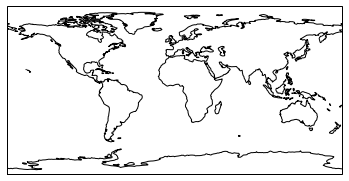

In [45]:
import cartopy.crs as ccrs

fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
ax.coastlines()

plt.show()

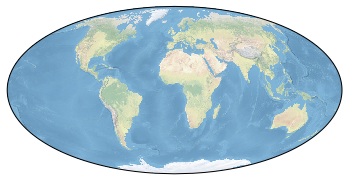

In [46]:
ax = plt.axes(projection=ccrs.Mollweide())
ax.stock_img()
plt.show()

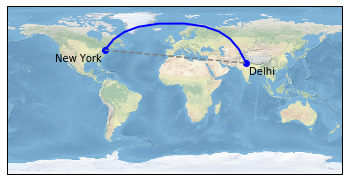

In [47]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

ny_lon, ny_lat = -75, 43
delhi_lon, delhi_lat = 77, 29

plt.plot(ny_lon, ny_lat,
         color='blue', marker='o',
         transform=ccrs.Geodetic(),
         )

plt.plot(delhi_lon, delhi_lat,
         color='blue', marker='o',
         transform=ccrs.Geodetic(),
         )

plt.text(ny_lon - 3, ny_lat - 12, 'New York',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.text(delhi_lon + 3, delhi_lat - 12, 'Delhi',
         horizontalalignment='left',
         transform=ccrs.Geodetic())

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='blue', linewidth=2,
         transform=ccrs.Geodetic(),
         )

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='gray', linestyle='--',
         transform=ccrs.PlateCarree(),
         )

plt.show()

## Some random data

[From here.](https://uoftcoders.github.io/studyGroup/lessons/python/cartography/lesson/)

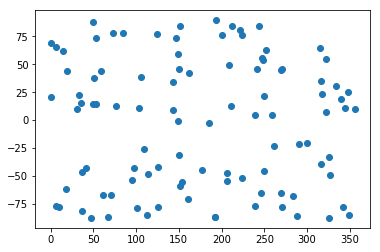

In [50]:
import numpy as np

np.random.seed(1)
lon = 360 * np.random.rand(100)
lat = 180 * np.random.rand(100) - 90

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(lon, lat)

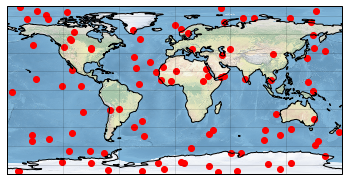

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

ax.scatter(lon, lat, c='r')
ax.stock_img()
ax.coastlines()
ax.gridlines(color='k', alpha=0.16)

## Web map services

ConnectionError: HTTPConnectionPool(host='vmap0.tiles.osgeo.org', port=80): Max retries exceeded with url: /wms/vmap0?service=WMS&request=GetCapabilities&version=1.1.1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f568d69e080>: Failed to establish a new connection: [Errno -2] Name or service not known'))

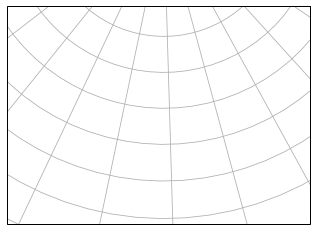

In [54]:
canada_east = -63
canada_west = -123
canada_north = 75
canada_south = 37

standard_parallels = (49, 77)
central_longitude = -(91 + 52 / 60)

projection = ccrs.LambertConformal(central_longitude=central_longitude,
                                   standard_parallels=standard_parallels
                                  )

fig = plt.figure()
ax = fig.add_subplot(111, projection=projection)
ax.set_extent([canada_west, canada_east, canada_south, canada_north])
ax.gridlines()

wms = 'http://vmap0.tiles.osgeo.org/wms/vmap0'
layers = ['basic']

ax.add_wms(wms, layers)

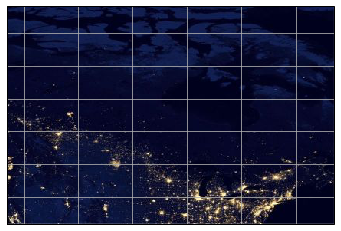

In [23]:
url = 'https://map1c.vis.earthdata.nasa.gov/wmts-geo/wmts.cgi'
layer = 'VIIRS_CityLights_2012'

fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

ax.set_extent([canada_west, canada_east, canada_south, canada_north])
ax.gridlines()
ax.add_wmts(url, layer)